In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Import Magic Kingdom attractions
mka = pd.read_csv("../attractions/attractions_mk.csv")
mka.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31039 entries, 0 to 31038
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   datetime              31039 non-null  object
 1   seven_dwarfs_train    31039 non-null  object
 2   pirates_of_caribbean  31039 non-null  object
 3   splash_mountain       31039 non-null  object
dtypes: object(4)
memory usage: 970.1+ KB


In [3]:
mka = mka[mka["datetime"] != '2019-12-31 01:00:00']
mka = mka[mka["datetime"] != '2019-12-31 00:00:00']
mka

,datetime,seven_dwarfs_train,pirates_of_caribbean,splash_mountain
0,2015-01-01 07:00:00,45.0,na,5.0
1,2015-01-01 08:00:00,78.0,na,5.0
2,2015-01-01 09:00:00,103.0,na,5.0
3,2015-01-01 10:00:00,88.0,28.0,16.0
4,2015-01-01 11:00:00,86.0,62.0,22.0
...,...,...,...,...
31034,2019-09-29 05:00:00,na,na,na
31035,2019-11-02 05:00:00,na,na,na
31036,2019-12-09 05:00:00,na,na,na
31037,2019-12-17 05:00:00,na,na,na


In [4]:
# Added DATE column to mk from the datetime column, using it to concat dataframes
mka['DATE'] = pd.to_datetime(mka['datetime']).dt.date
mka['DATE'] = pd.to_datetime(mka["DATE"])
print(mka.info())
mka.head(2)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31037 entries, 0 to 31038
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   datetime              31037 non-null  object        
 1   seven_dwarfs_train    31037 non-null  object        
 2   pirates_of_caribbean  31037 non-null  object        
 3   splash_mountain       31037 non-null  object        
 4   DATE                  31037 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(4)
memory usage: 1.4+ MB
None


,datetime,seven_dwarfs_train,pirates_of_caribbean,splash_mountain,DATE
0,2015-01-01 07:00:00,45.0,na,5.0,2015-01-01
1,2015-01-01 08:00:00,78.0,na,5.0,2015-01-01


In [5]:
# Import Metadata
md = pd.read_csv("../metadata/mk_metadata.csv")
md.head(2)

,DATE,DAYOFWEEK,DAYOFYEAR,WEEKOFYEAR,MONTHOFYEAR,YEAR,HOLIDAYPX,HOLIDAYM,HOLIDAY,WDWevent,...,MKDAYSBEFORENONEVENT,MKDAYSSINCENONEVENT,MKEVENTSTREAK,MKEVENTSTREAK_F,WDWMINTEMP_mean,WEATHER_WDWHIGH,WEATHER_WDWLOW,WEATHER_WDWPRECIP,CapacityLost_MK,CapacityLostWGT_MK
0,2015-01-01,5,0,0,1,2015,0,5,1,0,...,1.0,1,0,0,53.375714,70.3,50.2,0.12,616246,53904354
1,2015-01-02,6,1,0,1,2015,2,5,0,0,...,1.0,1,0,0,53.750714,70.3,50.0,0.12,616246,53904354


In [6]:
# Convert DATE column to datetime
md['DATE'] = pd.to_datetime(md["DATE"])
md.head(2)

,DATE,DAYOFWEEK,DAYOFYEAR,WEEKOFYEAR,MONTHOFYEAR,YEAR,HOLIDAYPX,HOLIDAYM,HOLIDAY,WDWevent,...,MKDAYSBEFORENONEVENT,MKDAYSSINCENONEVENT,MKEVENTSTREAK,MKEVENTSTREAK_F,WDWMINTEMP_mean,WEATHER_WDWHIGH,WEATHER_WDWLOW,WEATHER_WDWPRECIP,CapacityLost_MK,CapacityLostWGT_MK
0,2015-01-01,5,0,0,1,2015,0,5,1,0,...,1.0,1,0,0,53.375714,70.3,50.2,0.12,616246,53904354
1,2015-01-02,6,1,0,1,2015,2,5,0,0,...,1.0,1,0,0,53.750714,70.3,50.0,0.12,616246,53904354


In [7]:
# Merge mka and md dataframes
mk = pd.merge(mka, md, how='outer', on='DATE')
# Dropped unneeded Date column
mk.drop('DATE', axis = 1,  inplace = True)
# Set datetime to the Index and sorted by it
mk.set_index('datetime', inplace=True)
mk.sort_index(inplace=True)
mk.head(2)

,seven_dwarfs_train,pirates_of_caribbean,splash_mountain,DAYOFWEEK,DAYOFYEAR,WEEKOFYEAR,MONTHOFYEAR,YEAR,HOLIDAYPX,HOLIDAYM,...,MKDAYSBEFORENONEVENT,MKDAYSSINCENONEVENT,MKEVENTSTREAK,MKEVENTSTREAK_F,WDWMINTEMP_mean,WEATHER_WDWHIGH,WEATHER_WDWLOW,WEATHER_WDWPRECIP,CapacityLost_MK,CapacityLostWGT_MK
datetime,,,,,,,,,,,,,,,,,,,,,
2015-01-01 07:00:00,45.0,na,5.0,5,0,0,1,2015,0,5,...,1.0,1,0,0,53.375714,70.3,50.2,0.12,616246,53904354
2015-01-01 08:00:00,78.0,na,5.0,5,0,0,1,2015,0,5,...,1.0,1,0,0,53.375714,70.3,50.2,0.12,616246,53904354


In [8]:
# mk.tail(2)

In [9]:
# mk.isnull().sum()

In [10]:
# mk.fillna(0, inplace=True)
# mk.isnull().sum()

In [11]:
for col in ['MKOPEN', 'MKCLOSE',  'MKEMHOPEN', 'MKEMHCLOSE',
       'MKOPENYEST', 'MKCLOSEYEST', 'MKOPENTOM',
       'MKCLOSETOM','SUNSET_WDW']:
    mk[col] = np.where(mk[col] == "24:00",'23:59' ,mk[col])
    mk[col] = np.where(mk[col] == "27:00",'23:59' ,mk[col])
    mk[col] = np.where(mk[col] == "26:00",'23:59' ,mk[col])
    mk[col] = np.where(mk[col] == "25:00",'23:59' ,mk[col])
    mk[col] = np.where(mk[col] == "23:55",'23:59' ,mk[col])
    mk[col] = np.where(mk[col] == "29:59",'23:59' ,mk[col])
    mk[col] = np.where(mk[col] == "30:00",'23:59' ,mk[col])

In [12]:
for col in ['MKOPEN', 'MKCLOSE',  'MKEMHOPEN', 'MKEMHCLOSE',
       'MKOPENYEST', 'MKCLOSEYEST', 'MKOPENTOM',
       'MKCLOSETOM','SUNSET_WDW']:
    mk[col] = mk[col].str.replace(":","")

In [13]:
mk.fillna(0, inplace=True)
mk.isnull().sum()

seven_dwarfs_train      0
pirates_of_caribbean    0
splash_mountain         0
DAYOFWEEK               0
DAYOFYEAR               0
                       ..
WEATHER_WDWHIGH         0
WEATHER_WDWLOW          0
WEATHER_WDWPRECIP       0
CapacityLost_MK         0
CapacityLostWGT_MK      0
Length: 68, dtype: int64

In [14]:
for col in ['MKOPEN', 'MKCLOSE',  'MKEMHOPEN', 'MKEMHCLOSE',
       'MKOPENYEST', 'MKCLOSEYEST', 'MKOPENTOM',
       'MKCLOSETOM','SUNSET_WDW']:
    mk[col] = mk[col].astype(int)

In [15]:
for col in ['inSession', 'inSession_Enrollment', 'inSession_wdw',
       'inSession_sqrt_WDW', 'inSession_DC', 'inSession_Central_FL',
       'inSession_Drive1_FL', 'inSession_Drive2_FL',
       'inSession_Florida', 'inSession_Mardi_Gras', 'inSession_Midwest',
       'inSession_NY_NJ', 'inSession_NY_NJ_PA', 'inSession_New_England',
       'inSession_New_Jersey', 'inSession_Nothwest', 'INSESSION_PLANES',
       'inSession_SoCal', 'inSession_Southwest']:
    mk[col] = mk[col].str.replace(r'%', r'').astype('float')/-100

In [16]:
for col in ['seven_dwarfs_train', "pirates_of_caribbean", "splash_mountain"]:
    mk[col] = pd.to_numeric(mk[col],errors='coerce')
mk.fillna(0, inplace=True)

In [17]:
# Dummified the WDWSEASON column
mk = pd.get_dummies(mk,columns = ['WDWSEASON'])

In [18]:
# Created new column for hour as a feature
mk['hour'] = mk.index
mk['hour'] = mk.hour.str[11:13]
mk['hour'] = pd.to_numeric(mk['hour'])*100
mk.tail(5)

,seven_dwarfs_train,pirates_of_caribbean,splash_mountain,DAYOFWEEK,DAYOFYEAR,WEEKOFYEAR,MONTHOFYEAR,YEAR,HOLIDAYPX,HOLIDAYM,...,WDWSEASON_MARDI GRAS,WDWSEASON_MARTIN LUTHER KING JUNIOR DAY,WDWSEASON_MEMORIAL DAY,WDWSEASON_PRESIDENTS WEEK,WDWSEASON_SEPTEMBER LOW,WDWSEASON_SPRING,WDWSEASON_SUMMER BREAK,WDWSEASON_THANKSGIVING,WDWSEASON_WINTER,hour
datetime,,,,,,,,,,,,,,,,,,,,,
2019-12-30 19:00:00,143.0,44.0,80.0,2,363,52,12,2019,2,5,...,0,0,0,0,0,0,0,0,0,1900
2019-12-30 20:00:00,105.0,35.0,69.0,2,363,52,12,2019,2,5,...,0,0,0,0,0,0,0,0,0,2000
2019-12-30 21:00:00,113.0,25.0,42.0,2,363,52,12,2019,2,5,...,0,0,0,0,0,0,0,0,0,2100
2019-12-30 22:00:00,78.0,27.0,33.0,2,363,52,12,2019,2,5,...,0,0,0,0,0,0,0,0,0,2200
2019-12-30 23:00:00,50.0,16.0,14.0,2,363,52,12,2019,2,5,...,0,0,0,0,0,0,0,0,0,2300


In [19]:
mk.fillna(0, inplace=True)

In [20]:
mk.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31037 entries, 2015-01-01 07:00:00 to 2019-12-30 23:00:00
Data columns (total 85 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   seven_dwarfs_train                       31037 non-null  float64
 1   pirates_of_caribbean                     31037 non-null  float64
 2   splash_mountain                          31037 non-null  float64
 3   DAYOFWEEK                                31037 non-null  int64  
 4   DAYOFYEAR                                31037 non-null  int64  
 5   WEEKOFYEAR                               31037 non-null  int64  
 6   MONTHOFYEAR                              31037 non-null  int64  
 7   YEAR                                     31037 non-null  int64  
 8   HOLIDAYPX                                31037 non-null  int64  
 9   HOLIDAYM                                 31037 non-null  int64  
 10  HOLIDAY            

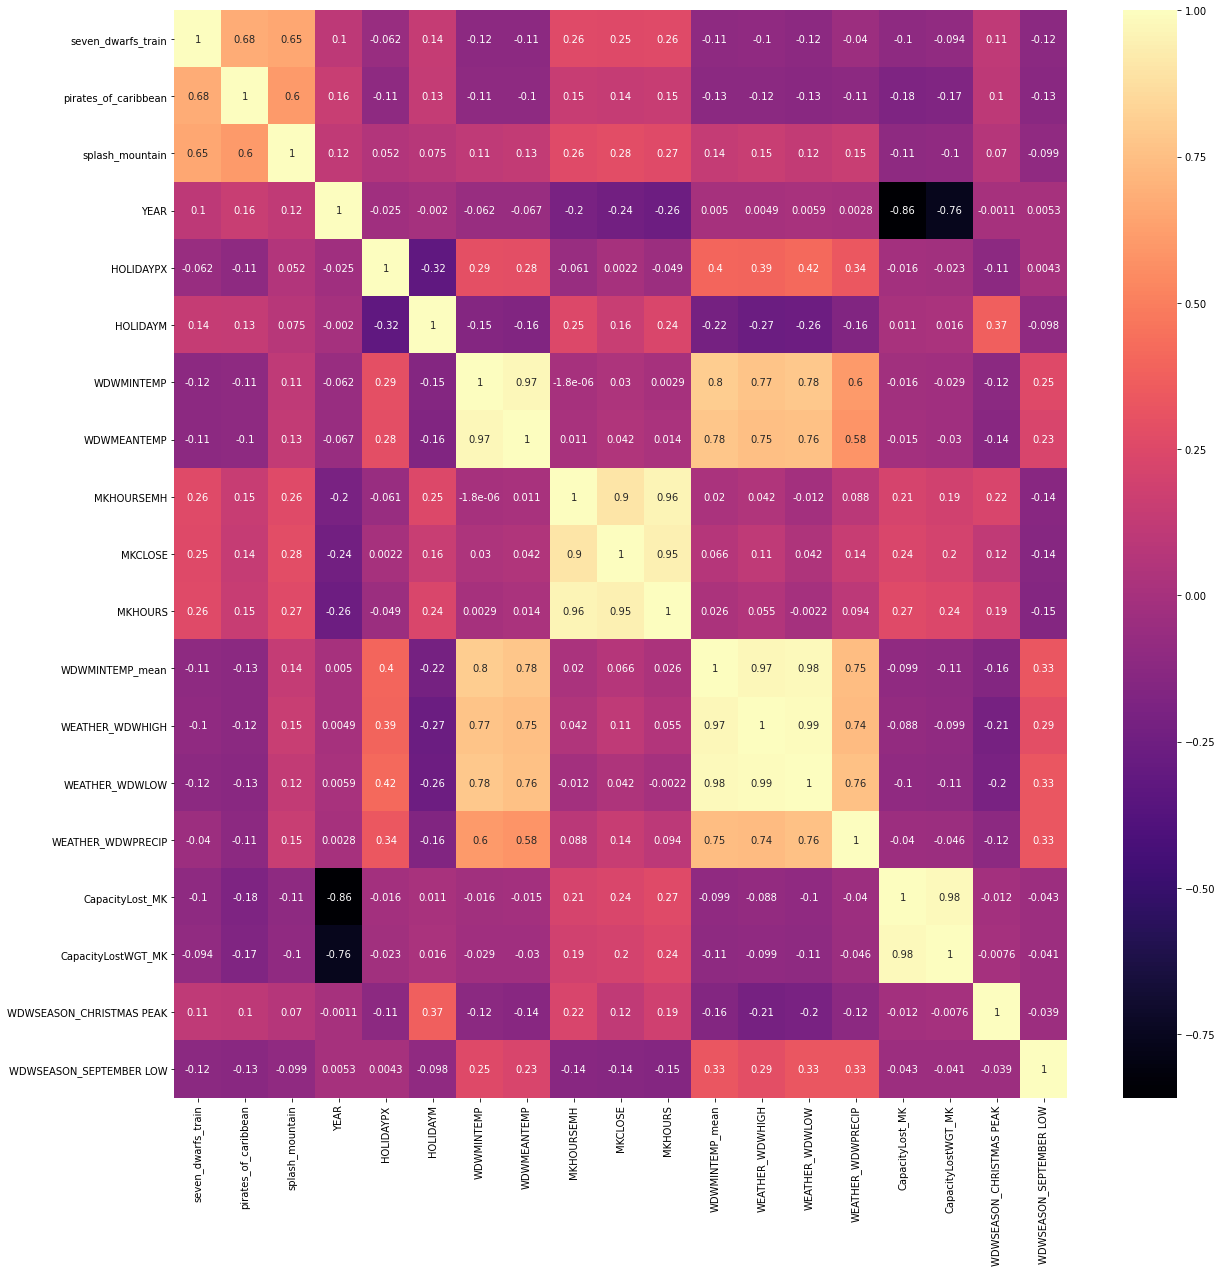

In [21]:
top_corr = mk.corr()
top_corr_features = top_corr.index[abs(top_corr["pirates_of_caribbean"]) > .10]
plt.figure(figsize=(20,20))
g = sns.heatmap(mk[top_corr_features].corr(),annot=True,cmap="magma")

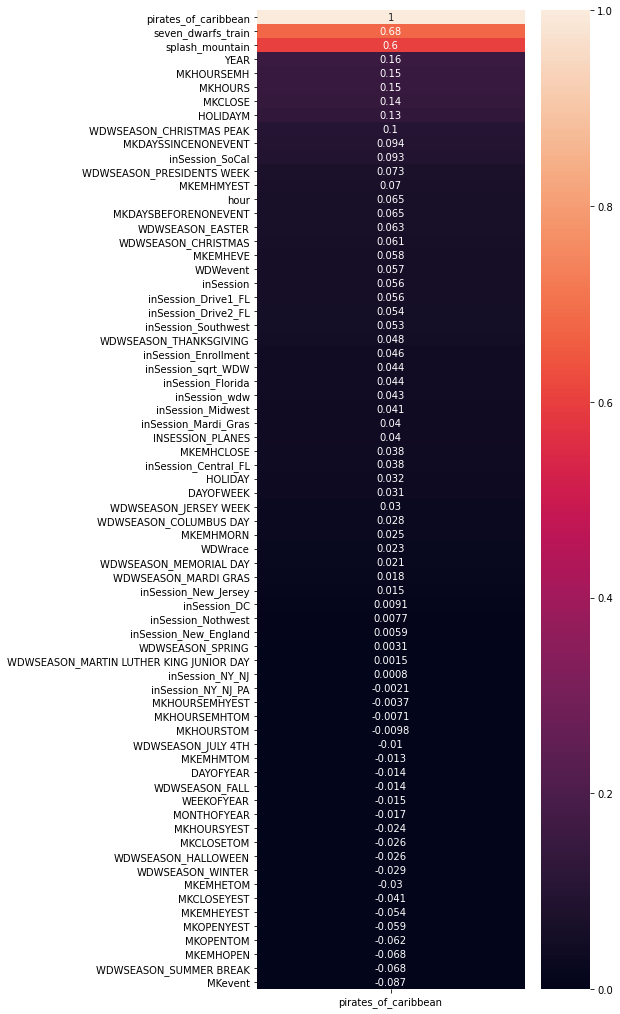

In [22]:
corr = mk.corr()
plt.figure(figsize = (6,18))
sns.heatmap(corr[['pirates_of_caribbean']].sort_values(by = 'pirates_of_caribbean', ascending = False).head(70),vmin = 0, annot = True)
plt.show()

In [23]:
# plt.plot(mk['pirates_of_caribbean']);

In [24]:
import numpy as np
from math import sqrt
from sklearn.datasets import make_classification, make_regression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GRU
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
%matplotlib inline

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.linear_model import LinearRegression
from datetime import date
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import statsmodels.api as sm

In [26]:
from math import sqrt
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.linear_model import Ridge, RidgeCV, LinearRegression, LogisticRegression, Lasso, LassoCV
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.ensemble import BaggingRegressor, BaggingClassifier, RandomForestRegressor, RandomForestClassifier, AdaBoostRegressor, AdaBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score
from sklearn import svm

In [27]:
features = ['YEAR', 'DAYOFWEEK', 'hour','MONTHOFYEAR','WEEKOFYEAR','DAYOFYEAR']
y = mk['pirates_of_caribbean']
X = mk[features]

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =.02, random_state=21)
sc = StandardScaler()
sc.fit(X_train)
X_train_sc = sc.transform(X_train)
X_test_sc = sc.transform(X_test)

In [29]:
# Created my model and started the train test split
linreg = LinearRegression()
linreg.fit(X_train_sc, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
linreg_preds_train = linreg.predict(X_train_sc)
linreg_rms_train = sqrt(mean_squared_error(y_train, linreg_preds_train))
linreg_rms_train

17.90989838568476

In [31]:
linreg_preds_test = linreg.predict(X_test_sc)
linreg_rms_test = sqrt(mean_squared_error(y_test, linreg_preds_test))
linreg_rms_test

17.636335515305102

In [32]:
12.16

12.16

## KNN

In [33]:
# Instiantiated KNN and fitted the training
knn = KNeighborsRegressor()
knn.fit(X_train_sc, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [34]:
knn_preds_train = knn.predict(X_train_sc)
knn_rms_train = sqrt(mean_squared_error(y_train, knn_preds_train))
knn_rms_train

6.806056130579875

In [35]:
knn_preds_test = knn.predict(X_test_sc)
knn_rms_test = sqrt(mean_squared_error(y_test, knn_preds_test))
knn_rms_test


9.981983770774223

In [36]:
9.16

9.16

## Decision Tree Model

In [37]:

# Instiantiate model and fit
dt = DecisionTreeRegressor()
dt.fit(X_train_sc, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [38]:
dt_preds_train = dt.predict(X_train_sc)
dt_rms_train = sqrt(mean_squared_error(y_train, dt_preds_train))
dt_rms_train

0.0

In [39]:
dt_preds_test = dt.predict(X_test_sc)
dt_rms_test = sqrt(mean_squared_error(y_test, dt_preds_test))
dt_rms_test

10.59319503258529

In [40]:
12.54

12.54

## Bagged Decision Tree

In [41]:
# Instiantiate model and fit
bag = BaggingRegressor()
bag.fit(X_train_sc, y_train)

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=10,
                 n_jobs=None, oob_score=False, random_state=None, verbose=0,
                 warm_start=False)

In [42]:
bag_preds_train = bag.predict(X_train_sc)
bag_rms_train = sqrt(mean_squared_error(y_train, bag_preds_train))
bag_rms_train

3.425838871762093

In [43]:
bag_preds_test = bag.predict(X_test_sc)
bag_rms_test = sqrt(mean_squared_error(y_test, bag_preds_test))
bag_rms_test

8.428386397317096

In [44]:
8.68

8.68

## Random Forests

In [45]:
# Instiantiate model and fit
rf = RandomForestRegressor()
rf.fit(X_train_sc, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [46]:

rf_preds_train = rf.predict(X_train_sc)
rf_rms_train = sqrt(mean_squared_error(y_train, rf_preds_train))
rf_rms_train

2.9040014086346306

In [47]:
rf_preds_test = rf.predict(X_test_sc)
rf_rms_test = sqrt(mean_squared_error(y_test, rf_preds_test))
rf_rms_test

8.246177468023502

In [48]:
8.48

8.48

## ADA boost

In [49]:
# Instiantiate model and fit
ada = AdaBoostRegressor()
ada.fit(X_train_sc, y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=None)

In [50]:
ada_preds_train = dt.predict(X_train_sc)
ada_rms_train = sqrt(mean_squared_error(y_train, dt_preds_train))
ada_rms_train

0.0

In [51]:
ada_preds_test = ada.predict(X_test_sc)
ada_rms_test = sqrt(mean_squared_error(y_test, ada_preds_test))
ada_rms_test

13.386762015523333

In [52]:
12.75

12.75

## SVM

In [53]:
# Instiantiate model and fit
svr = svm.SVR()
svr.fit(X_train_sc, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [54]:
svr_preds_train = svr.predict(X_train_sc)
svr_rms_train = sqrt(mean_squared_error(y_train, svr_preds_train))
svr_rms_train

12.611252800837597

In [55]:
svr_preds_test = svr.predict(X_test_sc)
svr_rms_test = sqrt(mean_squared_error(y_test, svr_preds_test))
svr_rms_test

13.005718568962578

In [56]:
11.30

11.3

# XG Boost

In [61]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [62]:
features = ['YEAR', 'DAYOFWEEK', 'hour','MONTHOFYEAR','WEEKOFYEAR','DAYOFYEAR']
y = mk['pirates_of_caribbean']
X = mk[features]

In [63]:
# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =.02, random_state=21)
sc = StandardScaler()
sc.fit(X_train)
X_train_sc = sc.transform(X_train)
X_test_sc = sc.transform(X_test)

In [64]:
# fit model no training data
model = XGBClassifier()
model.fit(X_train_sc, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [65]:
model_preds_train = model.predict(X_train_sc)
model_rms_train = sqrt(mean_squared_error(y_train, model_preds_train))
model_rms_train

19.419145250550226

In [66]:
model_preds_test = model.predict(X_test_sc)
model_rms_test = sqrt(mean_squared_error(y_test, model_preds_test))
model_rms_test

20.431220781164683

# FBPROPHET

In [67]:
# Python
import pandas as pd
from fbprophet import Prophet

In [68]:
df1 = mk[['pirates_of_caribbean']].copy()
df1 = df1[~(df1.index < '2016-01-01')]
       

In [69]:
df = df1
df.rename(columns = {'pirates_of_caribbean':'y'}, inplace = True)
df.head()

,y
datetime,
2016-01-01 00:00:00,5.0
2016-01-01 01:00:00,5.0
2016-01-01 02:00:00,0.0
2016-01-01 07:00:00,0.0
2016-01-01 08:00:00,5.0


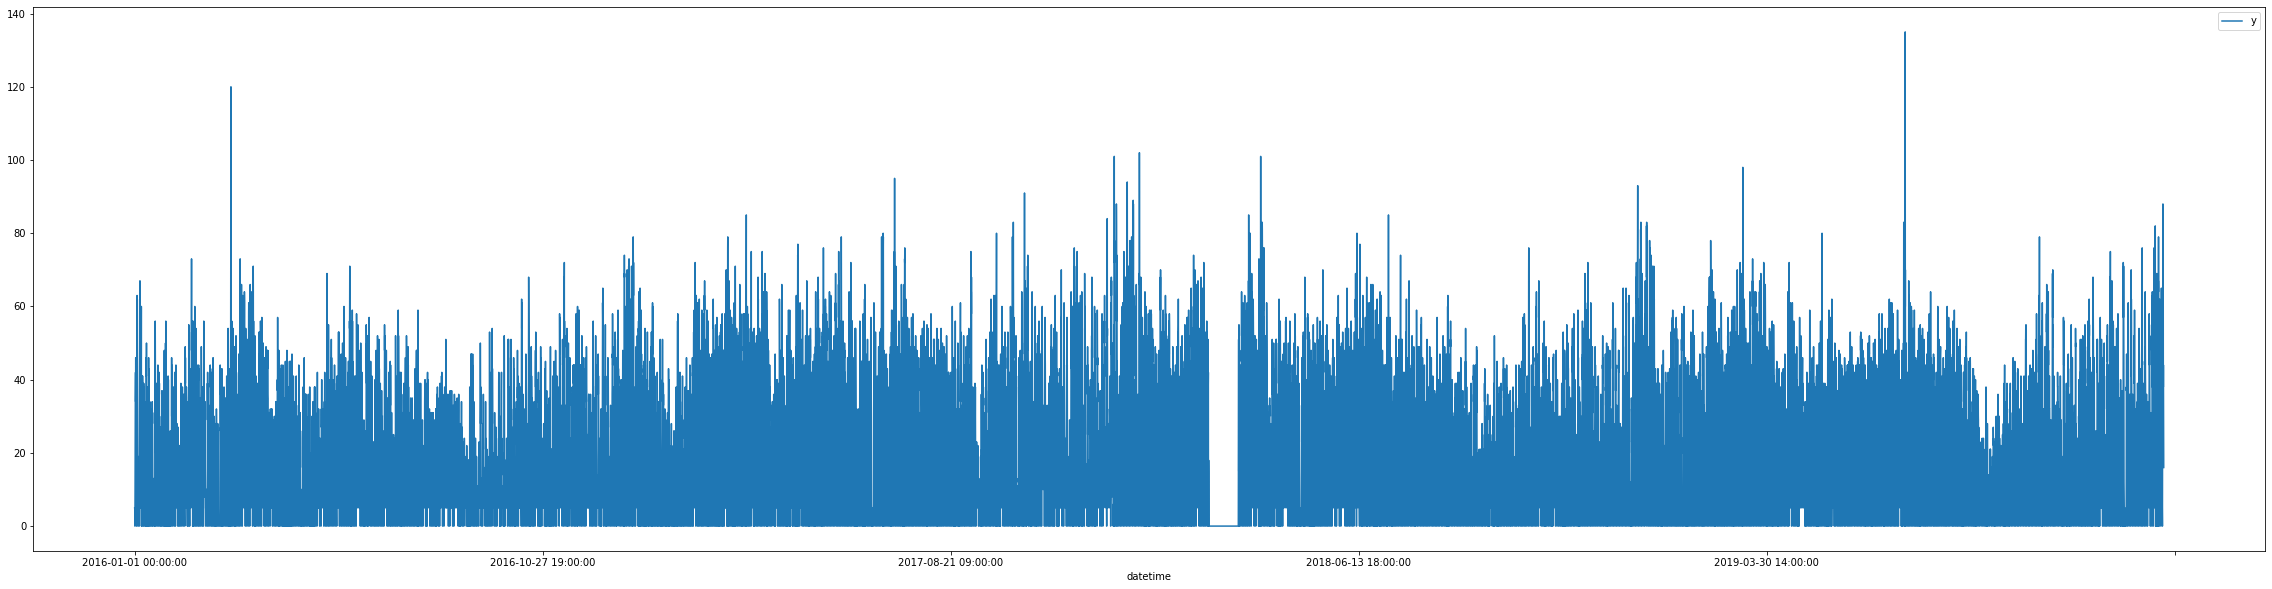

In [70]:
df.plot(figsize=(40,10));

In [71]:
df.index.name = 'ds'
df.head()

,y
ds,
2016-01-01 00:00:00,5.0
2016-01-01 01:00:00,5.0
2016-01-01 02:00:00,0.0
2016-01-01 07:00:00,0.0
2016-01-01 08:00:00,5.0


In [72]:
df = df.reset_index()
df.head()

,ds,y
0,2016-01-01 00:00:00,5.0
1,2016-01-01 01:00:00,5.0
2,2016-01-01 02:00:00,0.0
3,2016-01-01 07:00:00,0.0
4,2016-01-01 08:00:00,5.0


In [73]:
df['ds'] = pd.to_datetime(df["ds"])
df.head()

,ds,y
0,2016-01-01 00:00:00,5.0
1,2016-01-01 01:00:00,5.0
2,2016-01-01 02:00:00,0.0
3,2016-01-01 07:00:00,0.0
4,2016-01-01 08:00:00,5.0


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24865 entries, 0 to 24864
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      24865 non-null  datetime64[ns]
 1   y       24865 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 388.6 KB


In [75]:
m = Prophet()#yearly_seasonality=True, weekly_seasonality=True, )
m.add_country_holidays(country_name='US')
m.fit(df)

In [76]:
future = m.make_future_dataframe(periods=744, freq='h')
future.tail()


,ds
25604,2020-01-30 19:00:00
25605,2020-01-30 20:00:00
25606,2020-01-30 21:00:00
25607,2020-01-30 22:00:00
25608,2020-01-30 23:00:00


In [77]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(24)


,ds,yhat,yhat_lower,yhat_upper
25585,2020-01-30 00:00:00,3.060063,-11.138294,17.603835
25586,2020-01-30 01:00:00,1.049477,-13.614118,15.053506
25587,2020-01-30 02:00:00,1.222372,-13.864919,15.412967
25588,2020-01-30 03:00:00,3.191053,-12.509270,16.773620
25589,2020-01-30 04:00:00,4.618235,-8.799546,18.170999
25590,2020-01-30 05:00:00,3.296098,-11.204490,17.846413
25591,2020-01-30 06:00:00,-0.280435,-14.636264,14.376122
25592,2020-01-30 07:00:00,-2.529015,-18.501026,10.237721
25593,2020-01-30 08:00:00,0.603929,-14.881418,14.812458
25594,2020-01-30 09:00:00,10.108933,-4.323299,25.133135


In [78]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head(24)

,ds,yhat,yhat_lower,yhat_upper
0,2016-01-01 00:00:00,-6.314926,-21.637914,8.468987
1,2016-01-01 01:00:00,-8.400767,-22.943941,7.185789
2,2016-01-01 02:00:00,-8.232687,-23.286682,6.469490
3,2016-01-01 07:00:00,-10.957064,-25.543711,3.923336
4,2016-01-01 08:00:00,-7.421447,-22.165597,6.779205
5,2016-01-01 09:00:00,2.543886,-11.480281,16.963698
6,2016-01-01 10:00:00,15.586387,0.279331,30.510158
7,2016-01-01 11:00:00,26.289386,11.016589,39.824219
8,2016-01-01 12:00:00,31.110651,16.516460,46.036759
9,2016-01-01 13:00:00,30.612656,15.719975,43.904334


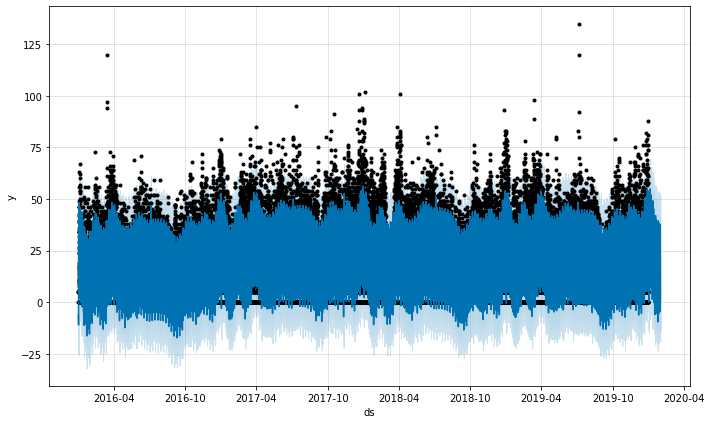

In [79]:
fig1 = m.plot(forecast)


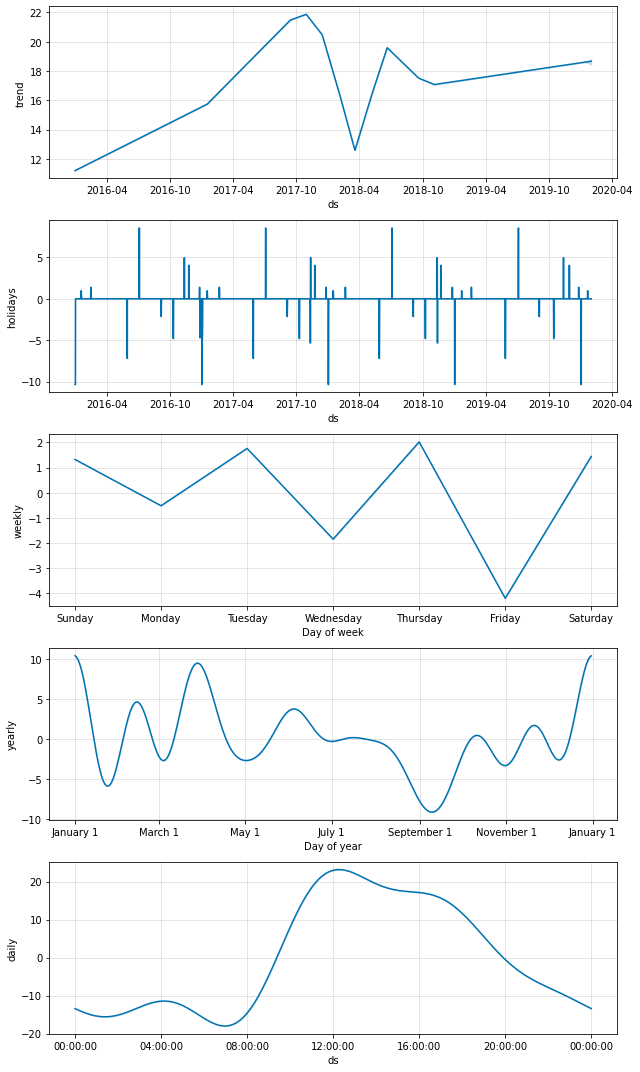

In [80]:
fig2 = m.plot_components(forecast)

In [81]:
# from fbprophet.plot import plot_plotly
# import plotly.offline as py
# py.init_notebook_mode()

# fig = plot_plotly(m, forecast)  # This returns a plotly Figure
# py.iplot(fig)


In [82]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='1095 days', period='30 days', horizon = '30 days')
df_cv.head()

INFO:fbprophet:Making 12 forecasts with cutoffs between 2019-01-04 23:00:00 and 2019-11-30 23:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2019-01-05 06:00:00,15.524389,2.014034,29.520704,0.0,2019-01-04 23:00:00
1,2019-01-05 07:00:00,13.825670,0.161566,29.491902,0.0,2019-01-04 23:00:00
2,2019-01-05 08:00:00,17.093477,1.055966,31.994570,5.0,2019-01-04 23:00:00
3,2019-01-05 09:00:00,26.592943,12.270567,40.223841,8.0,2019-01-04 23:00:00
4,2019-01-05 10:00:00,39.209492,25.258037,54.037609,35.0,2019-01-04 23:00:00


In [83]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

INFO:fbprophet:Skipping MAPE because y close to 0


,horizon,mse,rmse,mae,mdape,coverage
0,3 days 06:00:00,172.318029,13.126996,9.098368,0.398756,0.824000
1,3 days 07:00:00,172.344449,13.128002,9.103254,0.398756,0.824000
2,3 days 08:00:00,172.176739,13.121613,9.090065,0.403123,0.824960
3,3 days 09:00:00,171.795417,13.107075,9.059798,0.399910,0.827055
4,3 days 10:00:00,172.686625,13.141028,9.093040,0.393467,0.825600


In [87]:
df_p.describe()

,horizon,mse,rmse,mae,mdape,coverage
count,563,563.000000,563.000000,563.000000,563.000000,563.000000
mean,16 days 15:14:36.021314,125.983140,11.169365,8.385000,0.354898,0.825186
std,7 days 17:39:04.368512,25.238215,1.109324,0.643435,0.031252,0.023119
min,3 days 06:00:00,80.069737,8.948169,6.919710,0.298293,0.782400
25%,9 days 22:30:00,111.217344,10.545963,8.097889,0.333332,0.808000
50%,16 days 16:00:00,121.937903,11.042550,8.366620,0.346333,0.824800
75%,23 days 08:30:00,140.280742,11.844017,8.855407,0.383740,0.838400
max,30 days 00:00:00,196.814021,14.029042,9.699742,0.434321,0.876800


In [184]:
# df.set_index('ds', inplace=True)
forecast.set_index('ds', inplace=True)
forecast

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Christmas Day,Christmas Day_lower,Christmas Day_upper,Christmas Day (Observed),Christmas Day (Observed)_lower,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
ds,,,,,,,,,,,,,,,,,,,,,
2016-01-01 00:00:00,11.192538,-20.796207,7.371214,11.192538,11.192538,0.0,0.0,0.0,0.0,0.0,...,-4.196601,-4.196601,-4.196601,10.476105,10.476105,10.476105,0.0,0.0,0.0,-6.314926
2016-01-01 01:00:00,11.193033,-23.300055,6.413323,11.193033,11.193033,0.0,0.0,0.0,0.0,0.0,...,-4.322864,-4.322864,-4.322864,10.476796,10.476796,10.476796,0.0,0.0,0.0,-8.400767
2016-01-01 02:00:00,11.193528,-22.307778,6.556442,11.193528,11.193528,0.0,0.0,0.0,0.0,0.0,...,-4.411707,-4.411707,-4.411707,10.477244,10.477244,10.477244,0.0,0.0,0.0,-8.232687
2016-01-01 07:00:00,11.196003,-24.853422,3.235137,11.196003,11.196003,0.0,0.0,0.0,0.0,0.0,...,-4.261977,-4.261977,-4.261977,10.475861,10.475861,10.475861,0.0,0.0,0.0,-10.957064
2016-01-01 08:00:00,11.196498,-21.980899,7.942320,11.196498,11.196498,0.0,0.0,0.0,0.0,0.0,...,-4.112970,-4.112970,-4.112970,10.474858,10.474858,10.474858,0.0,0.0,0.0,-7.421447
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-30 19:00:00,18.670394,2.332356,32.348956,18.476599,18.843765,0.0,0.0,0.0,0.0,0.0,...,-3.079758,-3.079758,-3.079758,-3.690538,-3.690538,-3.690538,0.0,0.0,0.0,17.432128
2020-01-30 20:00:00,18.670541,-3.650661,26.042186,18.476327,18.844326,0.0,0.0,0.0,0.0,0.0,...,-3.358862,-3.358862,-3.358862,-3.662657,-3.662657,-3.662657,0.0,0.0,0.0,11.125031
2020-01-30 21:00:00,18.670687,-7.689442,19.983823,18.476055,18.844888,0.0,0.0,0.0,0.0,0.0,...,-3.613125,-3.613125,-3.613125,-3.634653,-3.634653,-3.634653,0.0,0.0,0.0,6.495234


In [196]:
viz_df = df1.join(forecast[['yhat', 'yhat_lower','yhat_upper']], how = 'outer') 
viz_df

,y,yhat,yhat_lower,yhat_upper
ds,,,,
2016-01-01 00:00:00,5.0,-6.314926,-20.796207,7.371214
2016-01-01 01:00:00,5.0,-8.400767,-23.300055,6.413323
2016-01-01 02:00:00,0.0,-8.232687,-22.307778,6.556442
2016-01-01 07:00:00,0.0,-10.957064,-24.853422,3.235137
2016-01-01 08:00:00,5.0,-7.421447,-21.980899,7.942320
...,...,...,...,...
2020-01-30 19:00:00,NaN,17.432128,2.332356,32.348956
2020-01-30 20:00:00,NaN,11.125031,-3.650661,26.042186
2020-01-30 21:00:00,NaN,6.495234,-7.689442,19.983823


In [197]:
viz_df['yhat_rescaled'] = np.exp(viz_df['yhat'])

In [198]:
viz_df.head()

,y,yhat,yhat_lower,yhat_upper,yhat_rescaled
ds,,,,,
2016-01-01 00:00:00,5.0,-6.314926,-20.796207,7.371214,0.001809
2016-01-01 01:00:00,5.0,-8.400767,-23.300055,6.413323,0.000225
2016-01-01 02:00:00,0.0,-8.232687,-22.307778,6.556442,0.000266
2016-01-01 07:00:00,0.0,-10.957064,-24.853422,3.235137,0.000017
2016-01-01 08:00:00,5.0,-7.421447,-21.980899,7.942320,0.000598


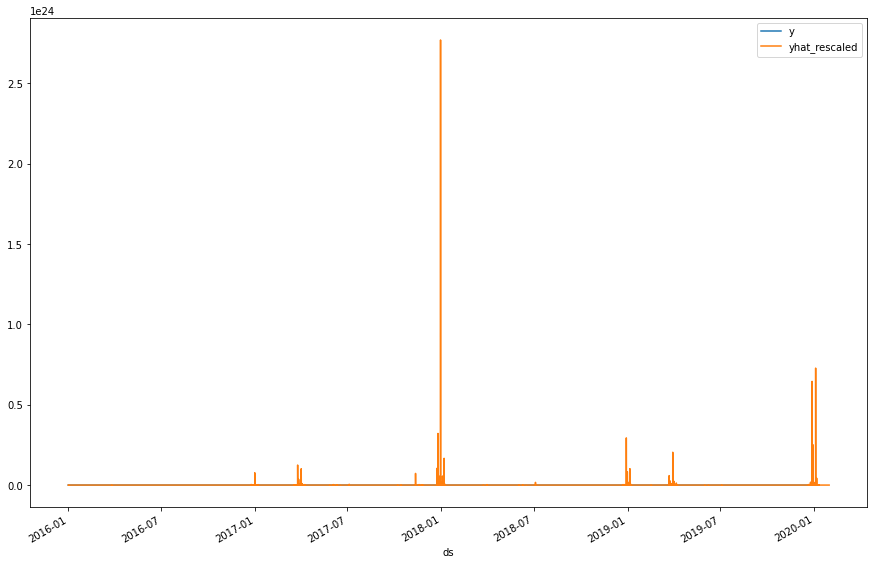

In [200]:
viz_df[['y', 'yhat_rescaled']].plot(figsize=(15,10));

In [201]:
df.index = pd.to_datetime(df.index) #make sure our index as a datetime object
connect_date = df.index[-2] #select the 2nd to last date

In [202]:
mask = (forecast.index > connect_date)
predict_df = forecast.loc[mask]

In [203]:
predict_df.head()

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Christmas Day,Christmas Day_lower,Christmas Day_upper,Christmas Day (Observed),Christmas Day (Observed)_lower,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
ds,,,,,,,,,,,,,,,,,,,,,
2016-01-01 00:00:00,11.192538,-20.796207,7.371214,11.192538,11.192538,0.0,0.0,0.0,0.0,0.0,...,-4.196601,-4.196601,-4.196601,10.476105,10.476105,10.476105,0.0,0.0,0.0,-6.314926
2016-01-01 01:00:00,11.193033,-23.300055,6.413323,11.193033,11.193033,0.0,0.0,0.0,0.0,0.0,...,-4.322864,-4.322864,-4.322864,10.476796,10.476796,10.476796,0.0,0.0,0.0,-8.400767
2016-01-01 02:00:00,11.193528,-22.307778,6.556442,11.193528,11.193528,0.0,0.0,0.0,0.0,0.0,...,-4.411707,-4.411707,-4.411707,10.477244,10.477244,10.477244,0.0,0.0,0.0,-8.232687
2016-01-01 07:00:00,11.196003,-24.853422,3.235137,11.196003,11.196003,0.0,0.0,0.0,0.0,0.0,...,-4.261977,-4.261977,-4.261977,10.475861,10.475861,10.475861,0.0,0.0,0.0,-10.957064
2016-01-01 08:00:00,11.196498,-21.980899,7.942320,11.196498,11.196498,0.0,0.0,0.0,0.0,0.0,...,-4.112970,-4.112970,-4.112970,10.474858,10.474858,10.474858,0.0,0.0,0.0,-7.421447


In [211]:
viz_df = df1.join(predict_df[['yhat', 'yhat_lower','yhat_upper']], how = 'outer')
viz_df['yhat_scaled']=np.exp(viz_df['yhat'])

In [212]:
viz_df.head()

,y,yhat,yhat_lower,yhat_upper,yhat_scaled
ds,,,,,
2016-01-01 00:00:00,5.0,-6.314926,-20.796207,7.371214,0.001809
2016-01-01 01:00:00,5.0,-8.400767,-23.300055,6.413323,0.000225
2016-01-01 02:00:00,0.0,-8.232687,-22.307778,6.556442,0.000266
2016-01-01 07:00:00,0.0,-10.957064,-24.853422,3.235137,0.000017
2016-01-01 08:00:00,5.0,-7.421447,-21.980899,7.942320,0.000598


In [213]:
viz_df.tail()

,y,yhat,yhat_lower,yhat_upper,yhat_scaled
ds,,,,,
2020-01-30 19:00:00,NaN,17.432128,2.332356,32.348956,3.721148e+07
2020-01-30 20:00:00,NaN,11.125031,-3.650661,26.042186,6.784839e+04
2020-01-30 21:00:00,NaN,6.495234,-7.689442,19.983823,6.619794e+02
2020-01-30 22:00:00,NaN,3.356799,-11.438697,17.634359,2.869720e+01
2020-01-30 23:00:00,NaN,0.495008,-13.298458,14.937020,1.640511e+00


IndexError: list index out of range

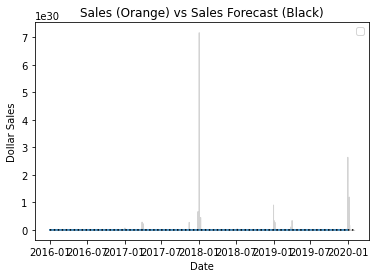

In [214]:
fig, ax1 = plt.subplots()
ax1.plot(viz_df.y)
ax1.plot(viz_df.yhat_scaled, color='black', linestyle=':')
ax1.fill_between(viz_df.index, np.exp(viz_df['yhat_upper']), np.exp(viz_df['yhat_lower']), alpha=0.5, color='darkgray')
ax1.set_title('Sales (Orange) vs Sales Forecast (Black)')
ax1.set_ylabel('Dollar Sales')
ax1.set_xlabel('Date')

L=ax1.legend() #get the legend
L.get_texts()[0].set_text('Actual Sales') #change the legend text for 1st plot
L.get_texts()[1].set_text('Forecasted Sales') #change the legend text for 2nd plot

In [215]:
se = np.square(forecast.loc[:, 'yhat'] - df1)
mse = np.mean(se)
rmse = np.sqrt(mse)

In [216]:
rmse

2016-01-01 00:00:00   NaN
2016-01-01 01:00:00   NaN
2016-01-01 02:00:00   NaN
2016-01-01 07:00:00   NaN
2016-01-01 08:00:00   NaN
                       ..
2020-01-30 20:00:00   NaN
2020-01-30 21:00:00   NaN
2020-01-30 22:00:00   NaN
2020-01-30 23:00:00   NaN
y                     NaN
Length: 25610, dtype: float64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,shuffle=False, random_state=42)

In [ ]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [ ]:
model = Sequential()
model.add(Dense(8, # How many neurons do we want in the first layer, 
               activation='relu',
               input_shape=(8,)))
model.add(Dense(1, activation=None))

In [ ]:
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['mse'])

In [ ]:
model.fit(X_train_sc, y_train,
         epochs=10,
         batch_size=16,
         validation_data=(X_test_sc, y_test))

In [ ]:
x

In [ ]:
features = ['splash_mountain', 'seven_dwarfs_train','YEAR', 'MKHOURS', 'MKHOURSEMH', 'inSession','DAYOFWEEK' ,'HOLIDAYM' ]

y = mk['pirates_of_caribbean']
# X = mk.drop(columns='pirates_of_caribbean')
X = mk[features] 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False)


In [ ]:
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

In [ ]:
# Create training sequences
train_seq = TimeseriesGenerator(
            X_train_sc, y_train,
            length=8,
            batch_size=64)

In [ ]:
# Create test sequences
batch_x, batch_y = train_seq[0]

In [ ]:
# train_seq[0]
# train_seq[0][0]
train_seq[0][0].shape

In [ ]:
test_seq = TimeseriesGenerator(
            X_test_sc, y_test,
            length=8,
            batch_size=64)

In [ ]:
# Design RNN
model = Sequential()
model.add(GRU(8, input_shape=(8, 8), return_sequences=True))
model.add(GRU(8, return_sequences=True))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['mse'])

In [ ]:
hist = model.fit(train_seq, epochs=5, validation_data=test_seq)

In [ ]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [ ]:
mk.index.min()


In [ ]:
mk.index.max()

In [ ]:
features = ['splash_mountain', 'seven_dwarfs_train', 'YEAR', 'MKHOURS', 'MKHOURSEMH', 'inSession','DAYOFWEEK' ,'HOLIDAYM']
y = mk['pirates_of_caribbean']
X = mk[features]

In [ ]:
'pirates_of_caribbean'

In [ ]:
y.plot(figsize=(15, 6))
plt.show()

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [ ]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

In [ ]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

In [ ]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 0, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

In [ ]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [ ]:
pred = results.get_prediction(start=('2020-03-13 21:00:00'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2015':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Wait Times')
plt.legend()
plt.show()